                                                                                               Submitted by : Vivek Raju

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
import graphviz
from sklearn import tree

warnings.filterwarnings('ignore')
#Load Cars dataset
fileURL = "http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
cars = pd.read_csv(fileURL, names=["Buying", "Maintenance", "Doors", "Persons",
                                       "Boot","Safety","Acceptability"], header=None,delim_whitespace=False)
cars_dup = cars.copy()

#Preprocessing Data as decisionTree function cannot take String inputs.
cars['Buying'] = cars['Buying'].map({'vhigh':3,'high':2,'med':1,'low':0})
cars['Maintenance'] = cars['Maintenance'].map({'vhigh':3,'high':2,'med':1,'low':0})
cars['Doors'] = cars['Doors'].map({'2':0,'3':1,'4':2,'5more':3})
cars['Persons'] = cars['Persons'].map({'2':0,'4':1,'more':2})
cars['Boot'] = cars['Boot'].map({'small':0,'med':1,'big':2})
cars['Safety'] = cars['Safety'].map({'low':0,'med':1,'high':2})
cars['Acceptability'] = cars['Acceptability'].map({'unacc':0,'acc':1,'good':2,'vgood':3})

#### 1. Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and 
anything else that you found to be interesting.
For this assignment the dataset I have chosen is to check for acceptability of cars. Based on different attributes, it is decided if the car is acceptable or not. 

There are 6 features in the dataset as described below.

1. Buying - Categorical variable with values v-high, high, med, low
2. Maintenance - Categorical variable with values v-high, high, med, low
3. Doors - Categorical variable with values 2, 3, 4, 5-more
4. Persons - Categorical variable with values 2, 4, more
5. Boot - Categorical variable with values small, med, big
6. Safety - Categorical variable with values low, med, high

This dataset contains 1728 instances. All features are categorical in nature and the class is also categorical.

The class describes the acceptability of the car. It can take 4 values :
1. Unacc
2. acc
3. good
4. v-good

Interesting observation : Majority of the samples lie in class 1 as seen in the cells that follow.

In [153]:
cars_dup.describe()

,Buying,Maintenance,Doors,Persons,Boot,Safety,Acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,2,more,med,med,unacc
freq,432,432,432,576,576,576,1210


#### 2. Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content of the dataset.

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety. Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

All features are categorical.

Distribution for class and each feature is given below.

In [154]:
for column in cars_dup:
    print(cars_dup[column].value_counts())

med      432
low      432
high     432
vhigh    432
Name: Buying, dtype: int64
med      432
low      432
high     432
vhigh    432
Name: Maintenance, dtype: int64
2        432
3        432
4        432
5more    432
Name: Doors, dtype: int64
more    576
2       576
4       576
Name: Persons, dtype: int64
med      576
big      576
small    576
Name: Boot, dtype: int64
med     576
low     576
high    576
Name: Safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: Acceptability, dtype: int64


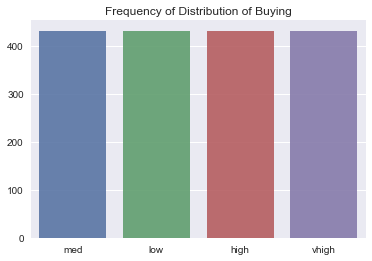

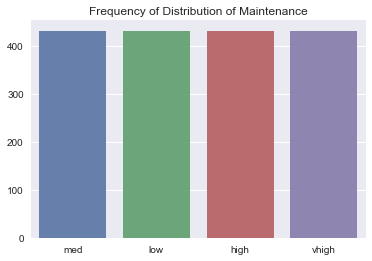

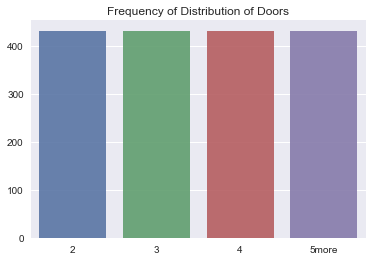

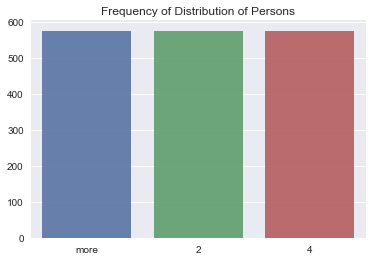

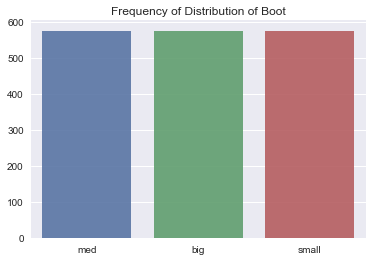

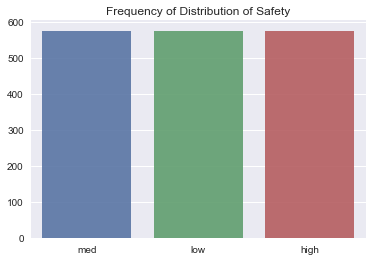

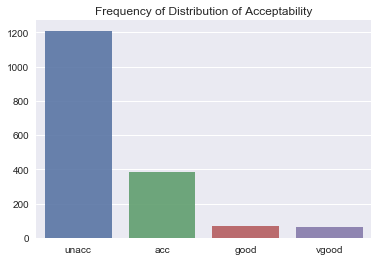

In [155]:
for column in cars_dup:
    count_cars = cars_dup[column].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(count_cars.index, count_cars.values, alpha=0.9)
    plt.title('Frequency of Distribution of ' + column)
    plt.show()

#### 3. Using scikit-learns DecisionTreeClassiﬁer, train a supervised learning model that can be used to generate predicions for your data. A reference to how you can do that can be found on scikit-learn


In [159]:
from sklearn.model_selection import train_test_split

x = cars.values[:,0:6]
y = cars.values[:,6:7]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [160]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [161]:
from sklearn.metrics import accuracy_score
y_train_acc = clf.predict(X_train)
accuracy_score(y_train,y_train_acc)

1.0

In [163]:
y_test_acc = clf.predict(X_test)
accuracy_score(y_test,y_test_acc)

0.9730250481695568

#### Create a visualization of your tree.

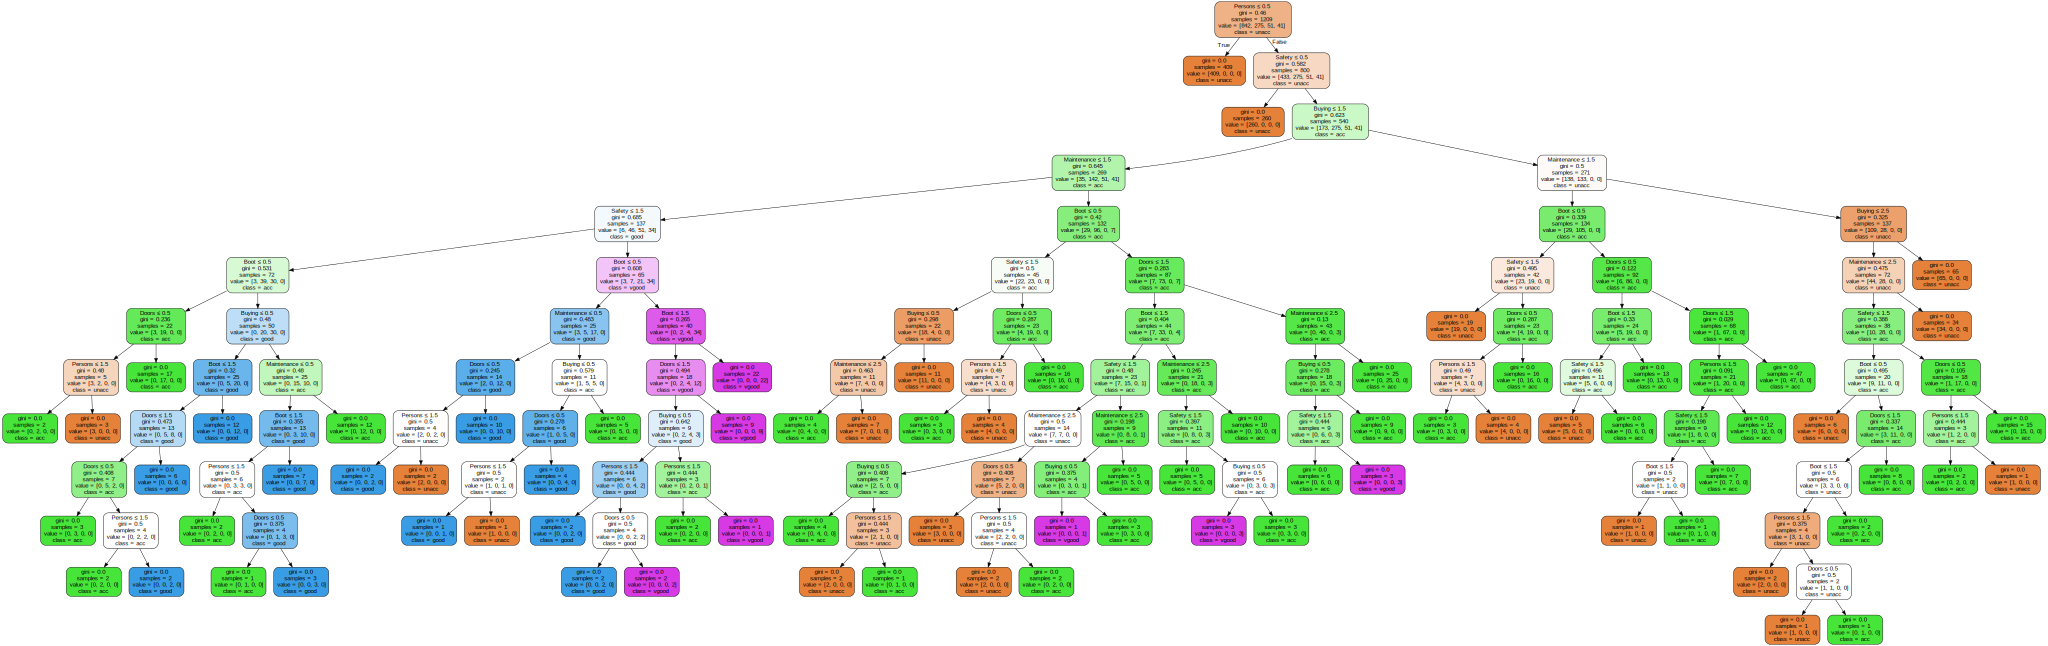

In [164]:
cars_features = ["Buying", "Maintenance", "Doors", "Persons","Boot","Safety"]
cars_classes = ["unacc","acc","good","vgood"]
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = cars_features, class_names = cars_classes,
                               filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

#### 5. Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that speciﬁc prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

My new instances are as follows : 

Instance 1:
1. Buying : low
2. Maintenance : low
3. Doors: 5more
4. Persons: more
5. Boot: med
6. Safety: high
[0,0,3,2,1,2]

Instance 2:
1. Buying: high
2. Maintenance: high
3. Doors: 2
4. Persons: 2
5. Boot: small
6. Safety: low
[3,3,0,0,0,0]

Instance 3:
1. Buying: low
2. Maintenance: low
3. Doors: 4
4. Persons: more
5. Boot: high
6. Safety: med
[0,0,2,2,2,1]

Instance 4:
1. Buying: low
2. Maintenance: low
3. Doors: 5more
4. Persons: 4
5. Boot: small
6. Safety: med
[0,0,3,1,0,1]

Instance 5:
1. Buying: low
2. Maintenance: med
3. Doors: 3
4. Persons: 4
5. Boot: Large
6. Safety: high
[0,1,2,1,2,2]

In [175]:
instance_1 = [[0,0,3,2,1,2]]

In [176]:
clf.predict(instance_1)

array([3], dtype=int64)

In [177]:
instance_2 = [[3,3,0,0,0,0]]

In [178]:
clf.predict(instance_2)

array([0], dtype=int64)

In [179]:
instance_3 = [[0,0,2,2,2,1]]

In [180]:
clf.predict(instance_3)

array([2], dtype=int64)

In [181]:
instance_4 = [[0,0,3,1,0,1]]

In [182]:
clf.predict(instance_4)

array([1], dtype=int64)

In [183]:
instance_5 = [[0,1,2,1,2,2]]

In [184]:
clf.predict(instance_5)

array([3], dtype=int64)

Using the above plotted decision tree as referrence, a brief description on how the model created went about generating the prediction for the new instance (instance_5) is as follows :

First level : Persons <= 0.5 evaluates to False.
Second level : Safety <= 0.5 also evaluates to False.
Third level : Buying <= 1.5 evaluates to True.
Fourth level : Maintenance <= 1.5 also evaluates to True.
Fifth level : Boot <= 0.5 evaluates to False.
Sixth level : Doors <= 1.5 evaluates to False.
Seventh level : Maintenance <= 2.5 evaluates to True.
Eighth level : Buying <= 0.5 evaluates to True.
Ninth level : Safety <= 1.5 evaluates to False.

Here we reach a leaf node that returns Acceptability value vgood which is the 3rd class.

The other four instances I had taken to test my Model had instances already present in the dataset itself and it matched the actual value for acceptability, thus helping us deduce that our model is pretty accurate. On checking the accuracy before also, we got pretty high percentages (100% for training and 97% for test).

There are various parameters that can be provided to the DecisionTreeClassifier function like 

Max depth, Min samples Split, Min samples leaf, Min weight Fraction leaf, Max Features, Random State, Max Leaf Nodes etc. 
These parameters can be tweaked to get better results if our model didn't provide us with accurate results, but our model already gave us correct values of acceptability in all five instances and also gave high accuracy results and hence in our case for this data set we receive good results with the default parameter itself.